**Farès Fadili, M2-APP-BDIA : Projet Deep Learning**

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projet')

In [ ]:
!ls

'Copie de fadili-fares-projet'	 fadili-fares-projet   X.npy   y.npy


In [ ]:
import numpy as np

In [ ]:
#Q1

X=np.load("X.npy")
y=np.load("y.npy")

Preprocessing

In [ ]:
X.shape

(23750, 62, 62, 3)

In [ ]:
y.shape

(23750, 2)

In [ ]:
y = np.argmax(y, axis=1)
print(y.shape)

(23750,)


In [ ]:
# Assign class names to the dataset
class_names = ['Dog', 'Cat']

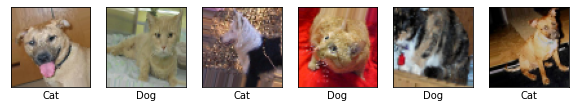

In [ ]:
# Plot 6 images and their associated class names
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y[i]])

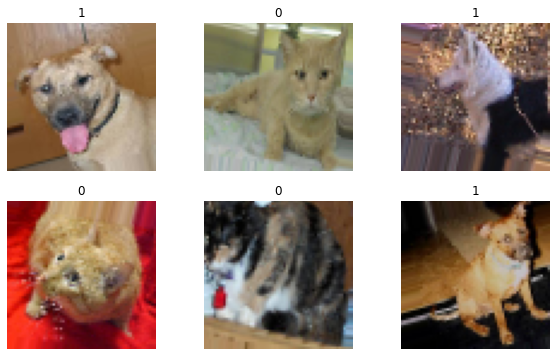

In [ ]:
#Q2

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
for i in range(6):
    ax[i//3, i%3].imshow(X[i])
    ax[i//3, i%3].set_title(str(y[i]))
    ax[i//3, i%3].axis("off")
plt.show()

In [ ]:
#Q3

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
#Q4

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.load("X.npy")
y = np.load("y.npy")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(62*62*3,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 62*62*3), y_train, epochs=10, batch_size=64, validation_data=(X_test.reshape(-1, 62*62*3), y_test))

val_loss, val_acc = model.evaluate(X_test.reshape(-1, 62*62*3), y_test)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

test_loss, test_acc = model.evaluate(X_test.reshape(-1, 62*62*3), y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Epoch 1/10
316/316 [==============================] - 4s 5ms/step - loss: 0.7721 - accuracy: 0.5313 - val_loss: 0.6768 - val_accuracy: 0.5678
Epoch 2/10
316/316 [==============================] - 1s 4ms/step - loss: 0.6831 - accuracy: 0.5782 - val_loss: 0.6832 - val_accuracy: 0.5591
Epoch 3/10
316/316 [==============================] - 1s 4ms/step - loss: 0.6774 - accuracy: 0.5795 - val_loss: 0.6624 - val_accuracy: 0.6051
Epoch 4/10
316/316 [==============================] - 1s 4ms/step - loss: 0.6683 - accuracy: 0.5881 - val_loss: 0.6610 - val_accuracy: 0.5978
Epoch 5/10
316/316 [==============================] - 1s 4ms/step - loss: 0.6638 - accuracy: 0.5957 - val_loss: 0.6625 - val_accuracy: 0.5919
Epoch 6/10
316/316 [==============================] - 1s 4ms/step - loss: 0.6597 - accuracy: 0.6026 - val_loss: 0.6933 - val_accuracy: 0.5630
Epoch 7/10
316/316 [==============================] - 1s 4ms/step - loss: 0.6589 - accuracy: 0.6021 - val_loss: 0.6634 - val_accuracy: 0.6012
Epoch 

112/112 [==============================] - 1s 7ms/step


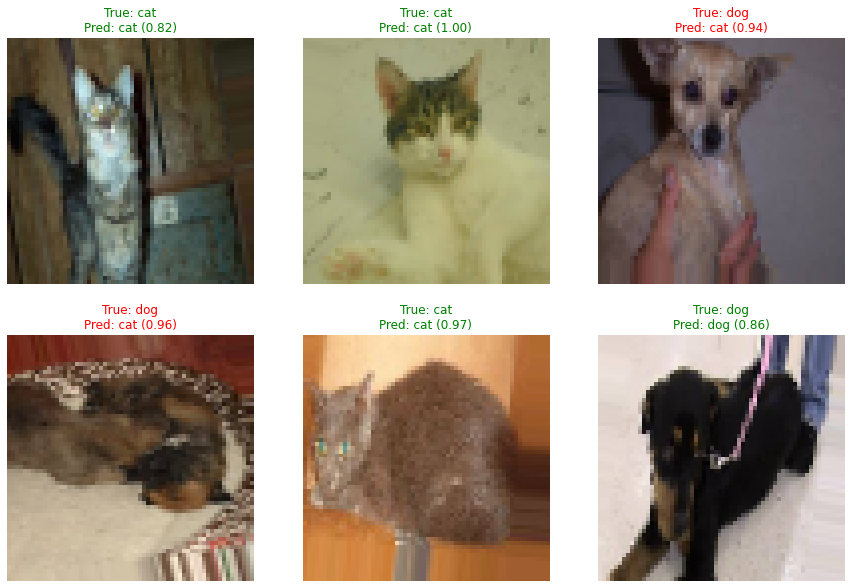

In [ ]:
#Q5

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_predictions(model, X, y, label_names):
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y, axis=1)

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.ravel()

    for i in range(6):
        axs[i].imshow(X[i])
        axs[i].axis('off')

        label = label_names[y_true[i]]
        prediction = label_names[y_pred_classes[i]]
        probability = y_pred[i][y_pred_classes[i]]

        if prediction == label:
            color = 'green'
        else:
            color = 'red'

        axs[i].set_title(f"True: {label}\nPred: {prediction} ({probability:.2f})", color=color)

    plt.show()
    
plot_predictions(model, X_test, y_test, ['cat', 'dog'])

In [ ]:
#Q6

from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(62, 62, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Q7

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

history = model.fit(X_train, y_train, epochs=10, verbose=0, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_acc)


Epoch 10: early stopping
Validation Loss:  0.6039934754371643
Validation Accuracy:  0.7878192663192749


In [ ]:
#Q8.1

from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# Load the MobileNetV2 base model and set the input shape
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(62,62,3))

# Freeze all layers in the base model to prevent their weights from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a GlobalAveragePooling2D layer to reduce the dimensions of the features from the base model
x = GlobalAveragePooling2D()(base_model.output)

# Add a fully connected layer with 128 units and relu activation
x = Dense(128, activation='relu')(x)

# Add a final fully connected layer with 2 units and a softmax activation to output the class probabilities
predictions = Dense(2, activation='softmax')(x)

# Create the final model by combining the base model and the added layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using the X_train and y_train data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data to get the validation loss and accuracy
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_acc)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
631/631 [==============================] - 16s 12ms/step - loss: 0.4872 - accuracy: 0.7627 - val_loss: 0.4559 - val_accuracy: 0.7791
Epoch 2/10
631/631 [==============================] - 6s 10ms/step - loss: 0.3904 - accuracy: 0.8182 - val_loss: 0.4610 - val_accuracy: 0.7777
Epoch 3/10
631/631 [==============================] - 7s 11ms/step - loss: 0.3157 - accuracy: 0.8575 - val_loss: 0.4821 - val_accuracy: 0.7861
Epoch 4/10
631/631 [==============================] - 6s 10ms/step - loss: 0.2327 - accuracy: 0.9050 - val_loss: 0.5430 - val_accuracy: 0.7825
Epoch 5/10
631/631 [==============================] - 7s 11ms/step - loss: 0.1518 - accuracy: 0.9424 - val_loss: 0.6283 - val_accuracy: 0.7755
Epoch 6/10
631/631 [==============================] - 6s 10ms/step - loss: 0.0874 - accuracy: 0.9724 - val_loss: 0.7166 - val_accuracy: 0.7794
Epoch 7/10
631/631 [==============================] - 6s 10ms/step - loss: 0.0

In [ ]:
#Q8.2

from keras.applications import VGG16
from keras.layers import Flatten

vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(62, 62, 3))

vgg16 = Sequential([
    vgg16,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vgg16_history = vgg16.fit(X_train, y_train, epochs=5, verbose=0, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

# Train the model using the X_train and y_train data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data to get the validation loss and accuracy
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_acc)

Epoch 1/10
631/631 [==============================] - 4s 7ms/step - loss: 0.1229 - accuracy: 0.9512 - val_loss: 0.7251 - val_accuracy: 0.7870
Epoch 2/10
631/631 [==============================] - 4s 7ms/step - loss: 0.0847 - accuracy: 0.9676 - val_loss: 0.8046 - val_accuracy: 0.7873
Epoch 3/10
631/631 [==============================] - 4s 7ms/step - loss: 0.0763 - accuracy: 0.9712 - val_loss: 0.8115 - val_accuracy: 0.7915
Epoch 4/10
631/631 [==============================] - 4s 7ms/step - loss: 0.0596 - accuracy: 0.9774 - val_loss: 0.9305 - val_accuracy: 0.7808
Epoch 5/10
631/631 [==============================] - 5s 7ms/step - loss: 0.0398 - accuracy: 0.9864 - val_loss: 1.0125 - val_accuracy: 0.7769
Epoch 6/10
631/631 [==============================] - 4s 7ms/step - loss: 0.0456 - accuracy: 0.9840 - val_loss: 1.0721 - val_accuracy: 0.7783
Epoch 7/10
631/631 [==============================] - 4s 7ms/step - loss: 0.0489 - accuracy: 0.9826 - val_loss: 1.1090 - val_accuracy: 0.7713
Epoch 

In [ ]:
#Q9

import pandas as pd

models = ['CNN (2 hidden dense layers)', 'CNN (3 hidden dense layers)', 'Mobilenetv2', 'VGG16']
Validation_loss = [0.6612638235092163, 0.6039934754371643, 1.0918281078338623, 1.124337077140808] 
Validation_accuracy = [0.5958461761474609, 0.7878192663192749, 0.7611563205718994, 0.7799606919288635]

df = pd.DataFrame({'Model': models, 'Validation Loss': Validation_loss, 'Validation_accuracy': Validation_accuracy})
print(df)

                         Model  Validation Loss  Validation_accuracy
0  CNN (2 hidden dense layers)         0.661264             0.595846
1  CNN (3 hidden dense layers)         0.603993             0.787819
2                  Mobilenetv2         1.091828             0.761156
3                        VGG16         1.124337             0.779961


In [ ]:
#Q10

import numpy as np
import tensorflow as tf

from tensorflow import keras

# Add noise to the data
mean = 0.35
var = 0.25
noise = np.random.normal(mean, var, X.shape)
X_noisy = X + noise

# Build the autoencoder model
input_img = keras.layers.Input(shape=X.shape[1:])

encoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)

decoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
decoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
decoded = keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = keras.models.Model(input_img, decoded)

# Compile the model with L1 regularization
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], loss_weights=[1.0, 0.0])

# Train the model
history = autoencoder.fit(X_noisy, X, epochs=10, batch_size=64, validation_split=0.15)

# Use the trained model to reconstruct the original images
reconstructed_images = autoencoder.predict(X_noisy)
